In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [2]:
import io
%cd "C:\Users\hp\OneDrive\Desktop\Upgrad Jupyter files\Advance Linear Regression"

C:\Users\hp\OneDrive\Desktop\Upgrad Jupyter files\Advance Linear Regression


In [3]:
df=pd.read_csv("train.csv",na_values="NaN")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',200)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(df.shape)

(1460, 81)


### Lets Check Null Value in Data

In [6]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

####  Missing Value Imputation

In [7]:
print(df["PoolQC"].value_counts(dropna=False))
df["SalePrice"].groupby(df["PoolQC"],dropna=False).mean()
#we can see house which having pool with excellent quality have very high sale price. so we can infer that house having pool
#or house not having pool there is significant difference in there price so we should not drop this column.
#so we impute missing value with No Pool.

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64


PoolQC
Ex     490000.000000
Fa     215500.000000
Gd     201990.000000
NaN    180404.663455
Name: SalePrice, dtype: float64

In [8]:
df["PoolQC"]=df["PoolQC"].fillna("No Pool")

In [9]:
print(df["PoolQC"].value_counts(dropna=False))

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64


In [10]:
print(df["MiscFeature"].value_counts())
df["SalePrice"].groupby(df["MiscFeature"],dropna=False).mean()
#we can see house price with tenniscourt is significantly high. So we can infer that house having miscfeature and not having misc
#have significant difference. so we should not drop this column.
#we impute missing value with "No Misc feature".

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


MiscFeature
Gar2    170750.000000
Othr     94000.000000
Shed    151187.612245
TenC    250000.000000
NaN     182046.410384
Name: SalePrice, dtype: float64

In [11]:
df["MiscFeature"]=df["MiscFeature"].fillna("No Misc feature")
print(df["MiscFeature"].value_counts())

No Misc feature    1406
Shed                 49
Gar2                  2
Othr                  2
TenC                  1
Name: MiscFeature, dtype: int64


In [12]:
print(df["Alley"].value_counts(dropna=False))
df["SalePrice"].groupby(df["Alley"],dropna=False).mean()
#we impute missing value with "No Alley Access"

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64


Alley
Grvl    122219.080000
Pave    168000.585366
NaN     183452.131483
Name: SalePrice, dtype: float64

In [13]:
df["Alley"]=df["Alley"].fillna("No Alley Access")

In [14]:
print(df["Fence"].value_counts(dropna=False))
df["SalePrice"].groupby(df["Fence"],dropna=False).mean()

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64


Fence
GdPrv    178927.457627
GdWo     140379.314815
MnPrv    148751.089172
MnWw     134286.363636
NaN      187596.837998
Name: SalePrice, dtype: float64

In [15]:
df["Fence"]=df["Fence"].fillna("No Fence")

In [16]:
print(df["FireplaceQu"].value_counts(dropna=False))
df["SalePrice"].groupby(df["FireplaceQu"],dropna=False).mean()

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64


FireplaceQu
Ex     337712.500000
Fa     167298.484848
Gd     226351.415789
Po     129764.150000
TA     205723.488818
NaN    141331.482609
Name: SalePrice, dtype: float64

In [17]:
df["FireplaceQu"]=df["FireplaceQu"].fillna("No Fire Place")

In [18]:
df["LotFrontage"].describe()
#meann and median are quite same so replace missing value with mean
df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"].mean())

In [19]:
garage=df[["GarageCond","GarageFinish","GarageQual","GarageType"]]

In [20]:
for col in garage.columns:
    df[col]=df[col].fillna("No Garage")

In [21]:
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(9999)
#we impute with this invalid year so we can interpret this year as No garage without changing datatype of this column

In [22]:
Bsmnt=df[["BsmtExposure","BsmtFinType2","BsmtFinType1","BsmtQual","BsmtCond"]]
for col in Bsmnt.columns:
    df[col]=df[col].fillna("No Basement")

In [23]:
df["MasVnrType"]=df["MasVnrType"].fillna(df["MasVnrType"].value_counts().idxmax())
df["Electrical"]=df["Electrical"].fillna(df["Electrical"].value_counts().idxmax())
df["MasVnrArea"]=df["MasVnrArea"].fillna(df["MasVnrArea"].mean())

In [24]:
df.isnull().sum().sort_values(ascending=False)
#Now there is no Missing value in our data

Id               0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
HeatingQC        0
MSSubClass       0
Heating          0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities   

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Exploratory data analysis

#### Numerical Variable

In [26]:
# list of numerical variables
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']

print("Number of Numerical Features is {}".format(len(numerical_features)))

# visualise the numerical variables
df[numerical_features].head()

Number of Numerical Features is 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### **Temporal Variables(Eg: Datetime Vairbale)**
#### From the dataset we have 4 year vaiables. We have extract information from the datetime variables like no. of years or no. of days. One example in this specific scenario can be difference in years between the year the house was built and the house was sold. We will be performing this analysis in the Feature Engineering.

In [27]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [28]:
for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

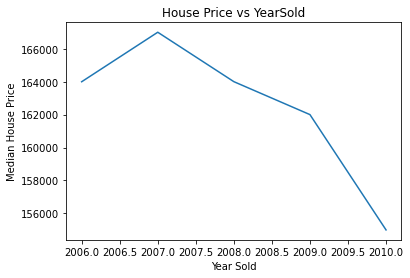

In [29]:
## Let's analyze the temoral Datetime Variables
## We will check whether these is a relation between year the house is sold and year

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")
#we can see house sale price is decreasing drastically after 2007

Text(0.5, 1.0, 'House Price vs YearBuilt')

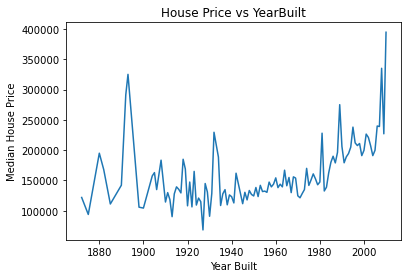

In [30]:
df.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel('Year Built')
plt.ylabel('Median House Price')
plt.title("House Price vs YearBuilt")

### 2 Types of Numerical Variables:
#### 1. Continuous
#### 2. Discrete

In [31]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in year_feature+['Id']]

print("Discrete Variables {}".format(len(discrete_features)))

Discrete Variables 17


In [32]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

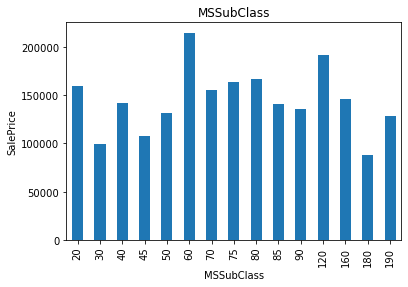

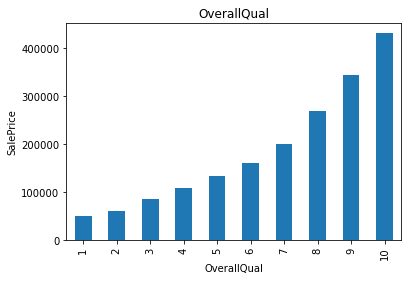

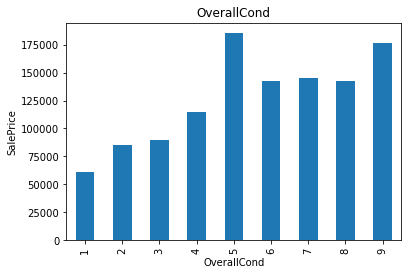

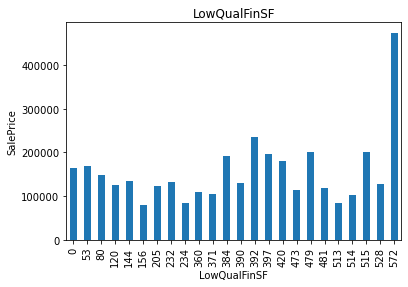

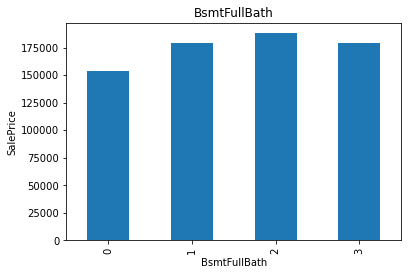

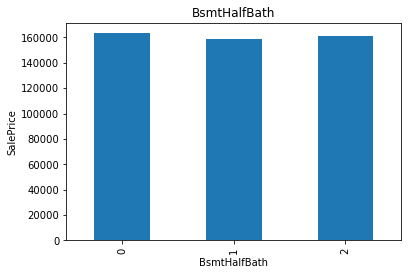

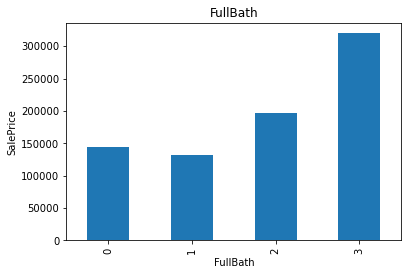

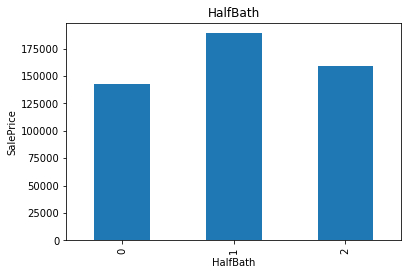

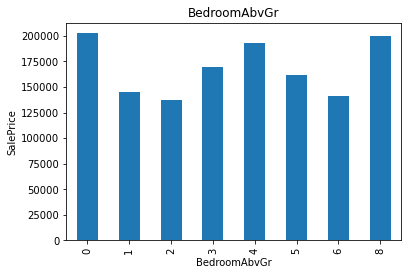

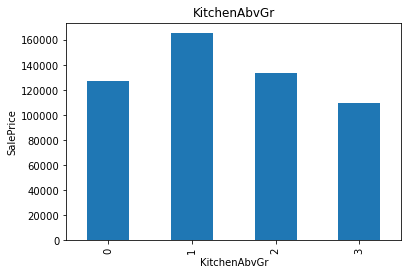

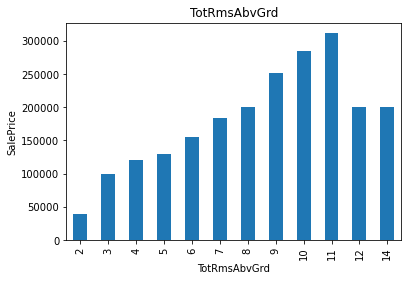

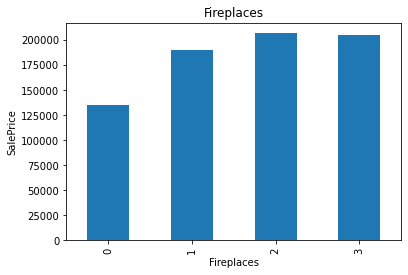

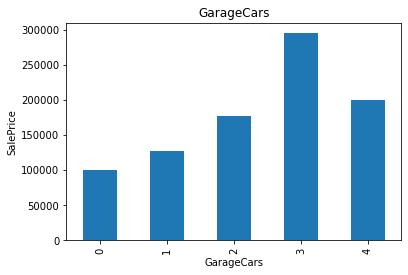

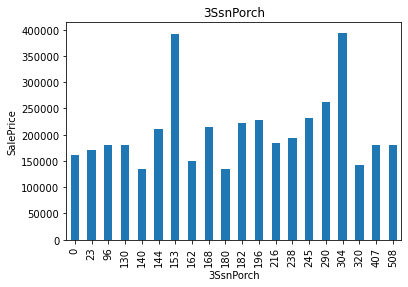

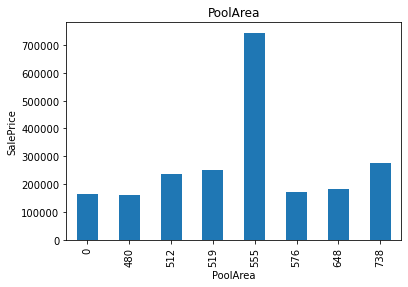

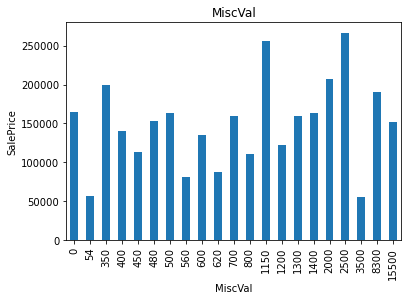

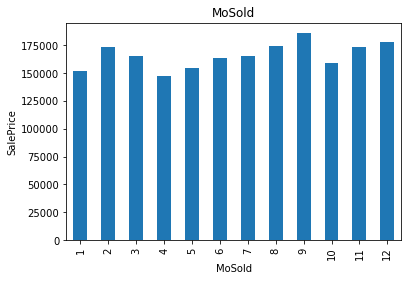

In [33]:
for feature in discrete_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [34]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features and feature not in year_feature + ['Id']]
print("Continuous Features {}".format(len(continous_features)))

Continuous Features 16


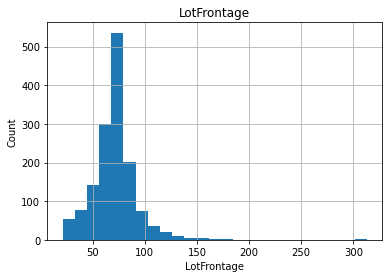

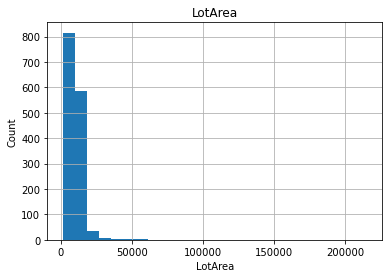

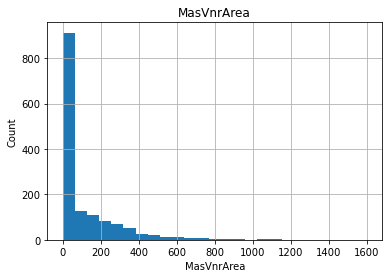

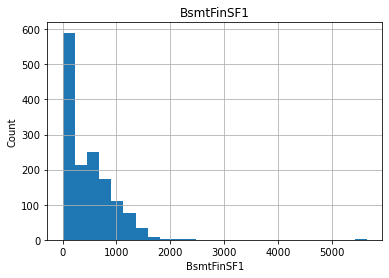

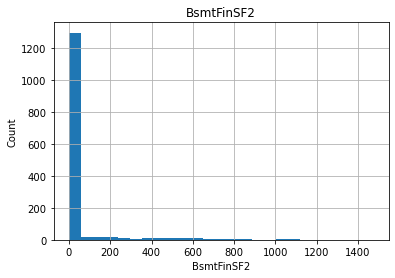

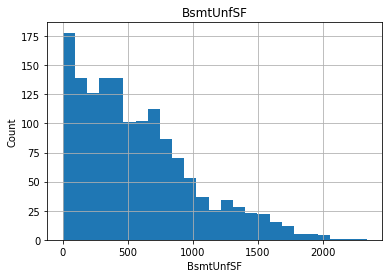

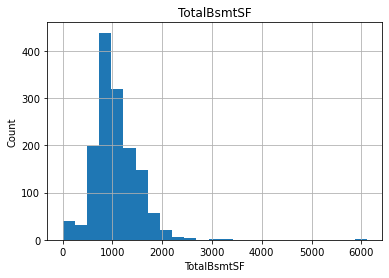

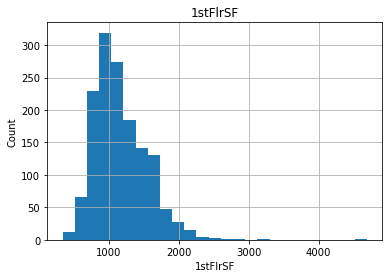

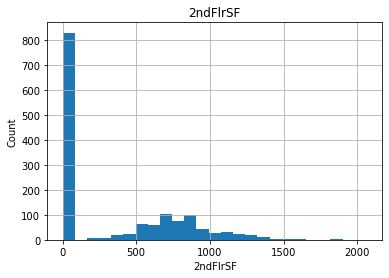

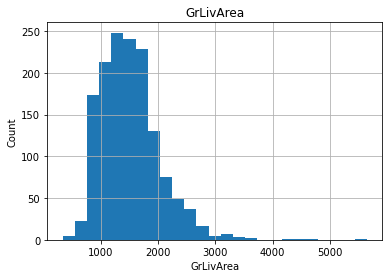

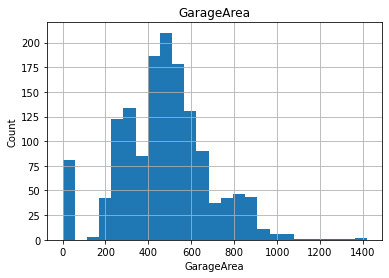

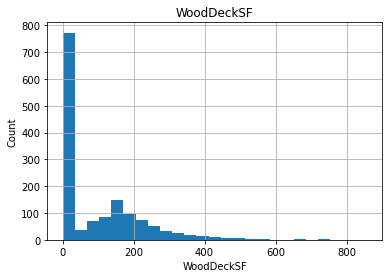

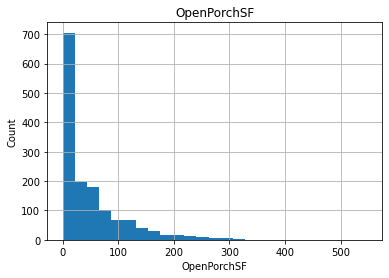

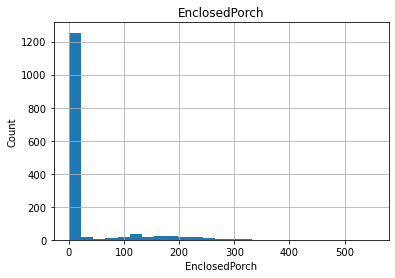

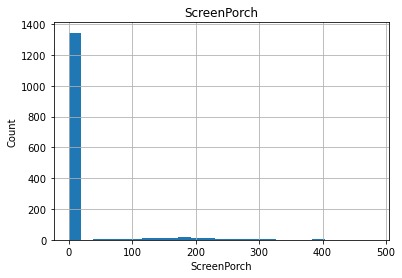

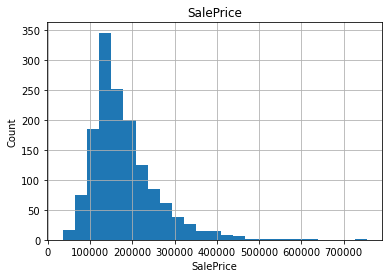

In [35]:
for feature in continous_features:
    data = df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Categorical Features

In [36]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("Categorical features {}".format(len(categorical_features)))

Categorical features 43


####  Relationship b/w categorical variable and dependent feature('SalePrice)

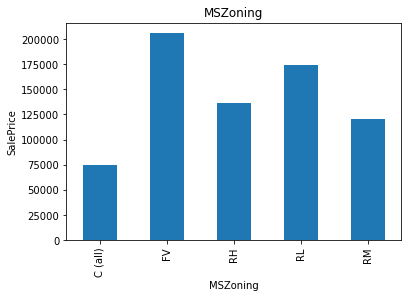

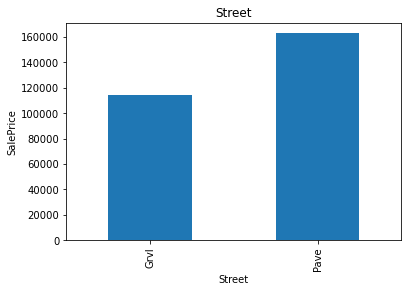

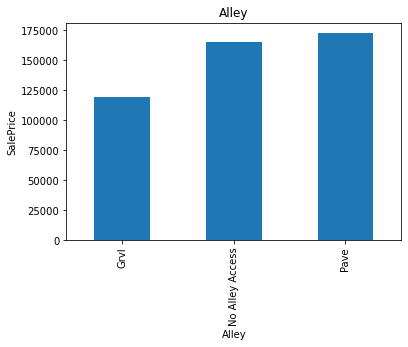

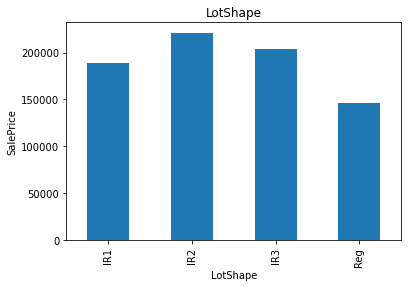

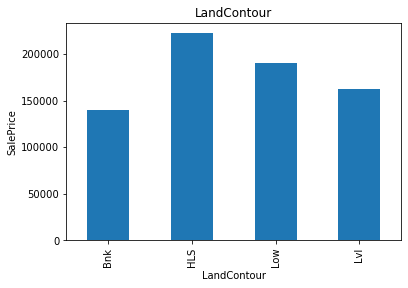

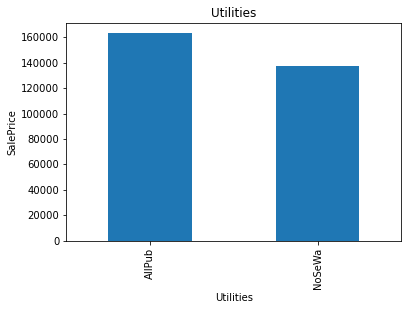

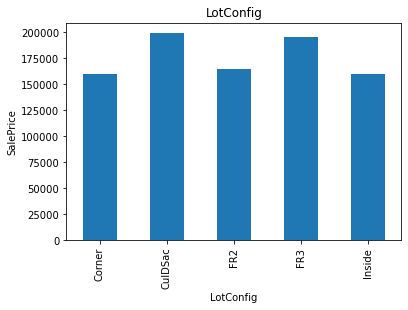

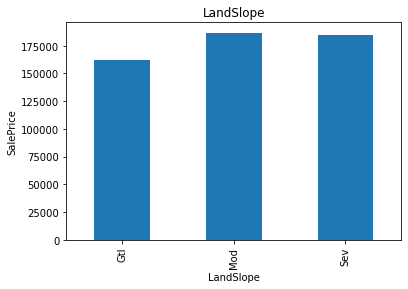

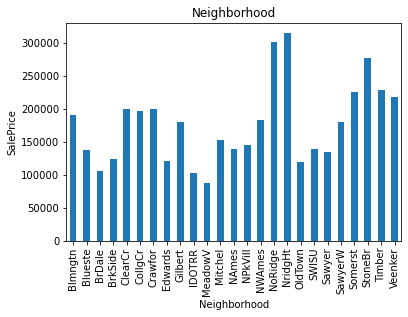

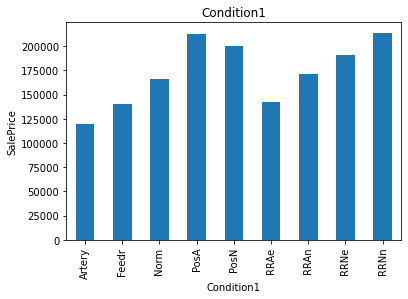

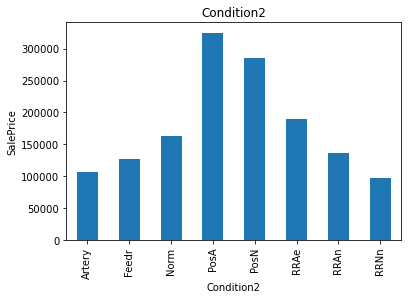

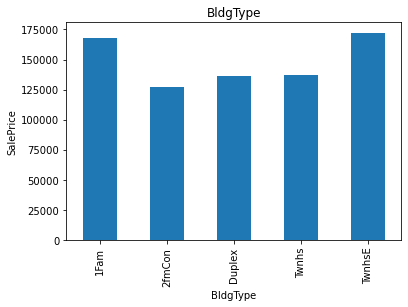

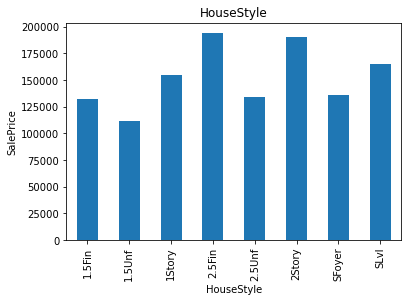

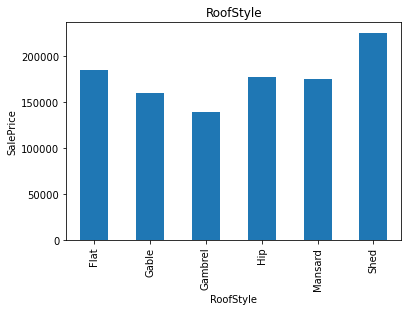

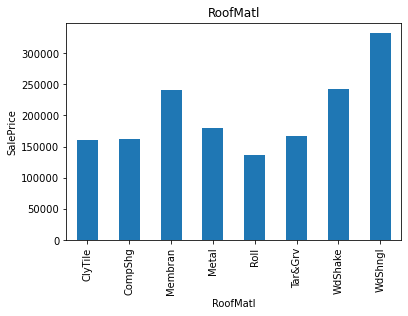

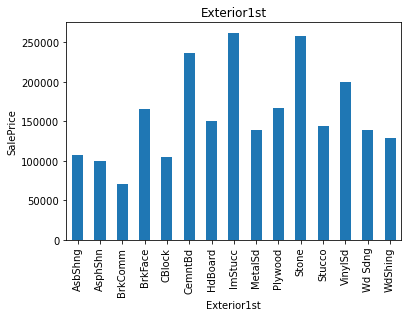

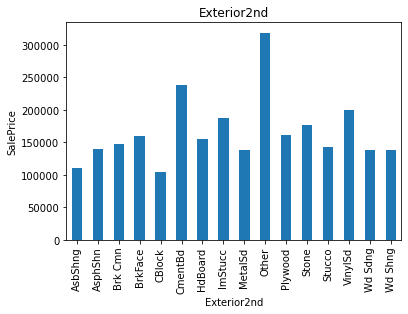

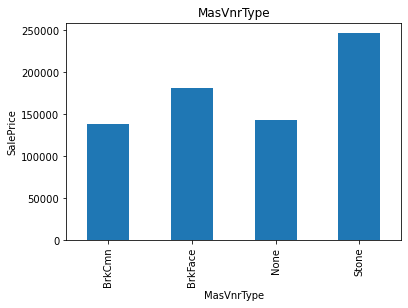

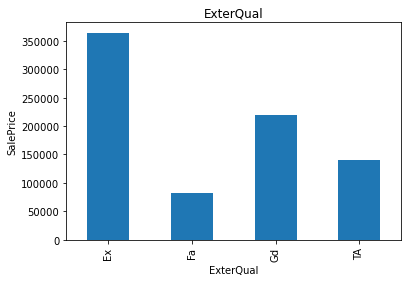

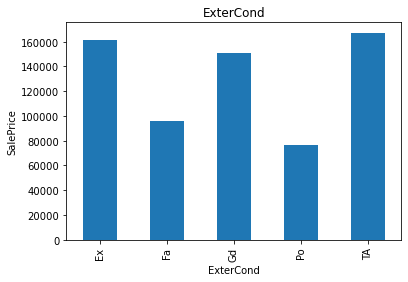

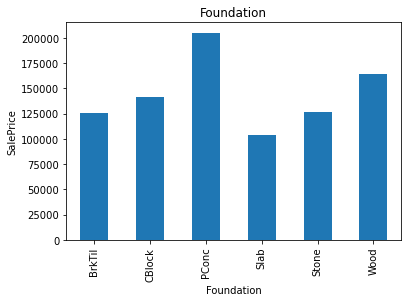

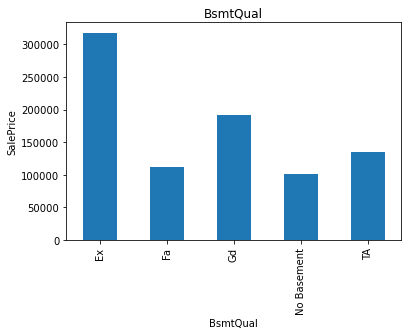

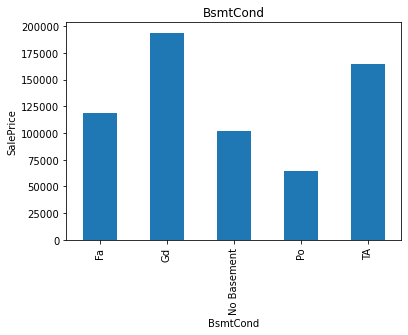

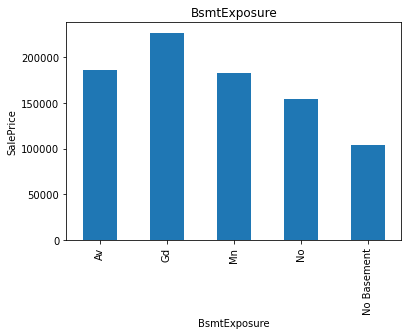

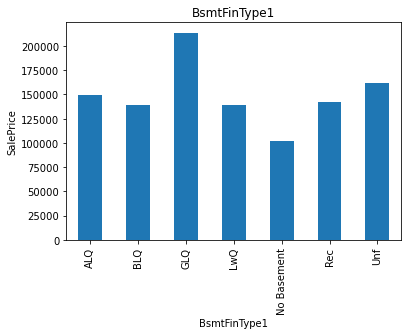

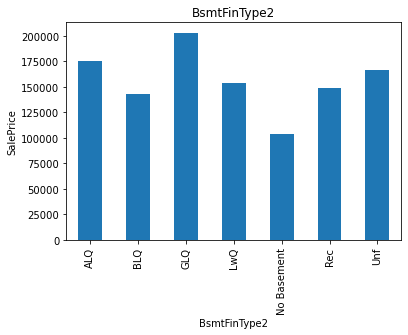

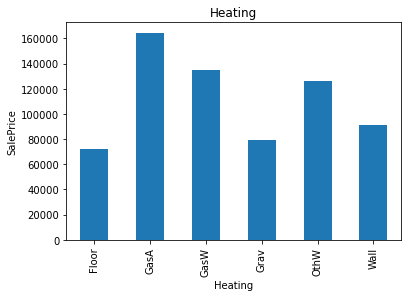

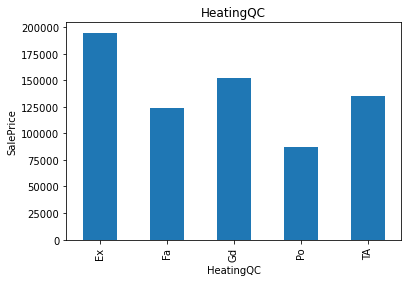

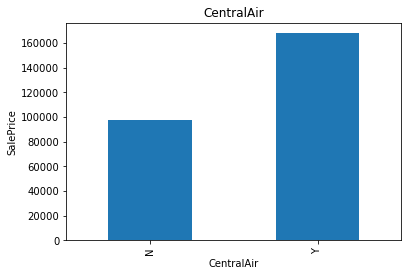

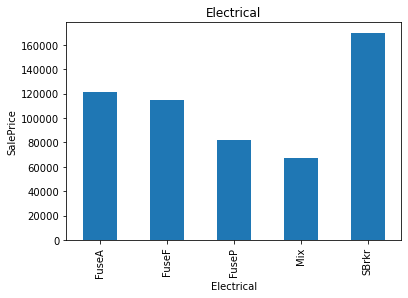

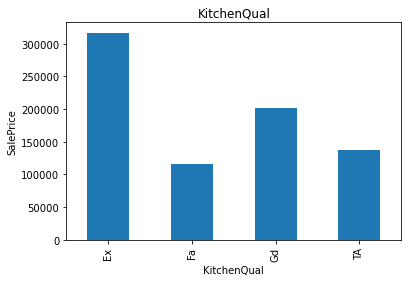

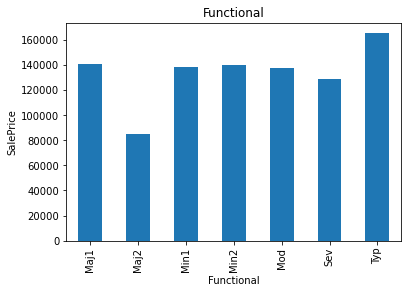

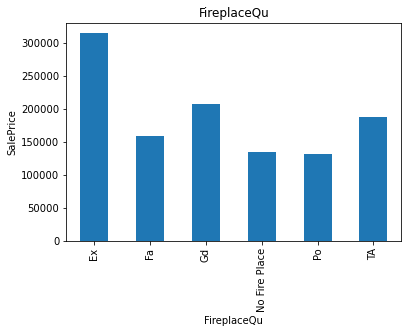

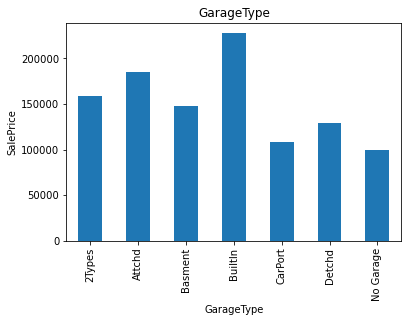

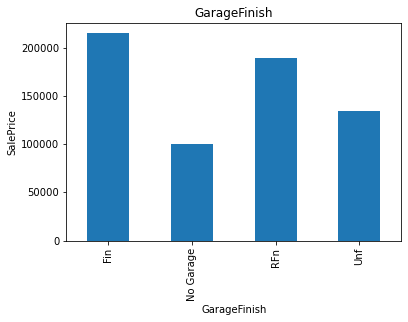

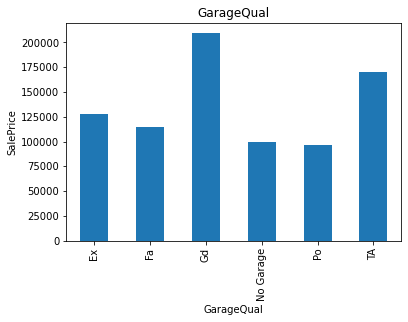

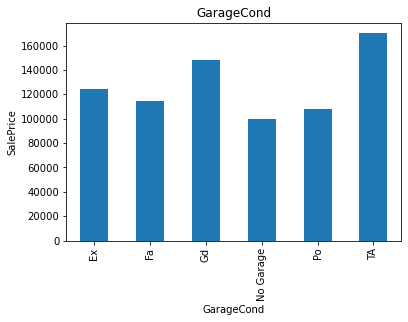

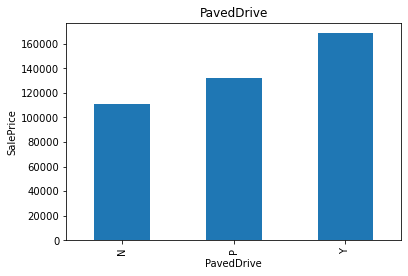

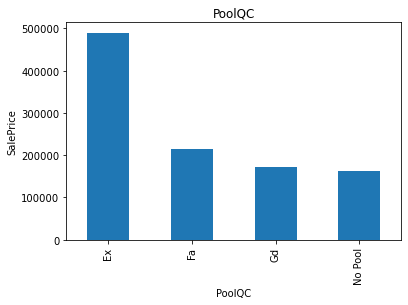

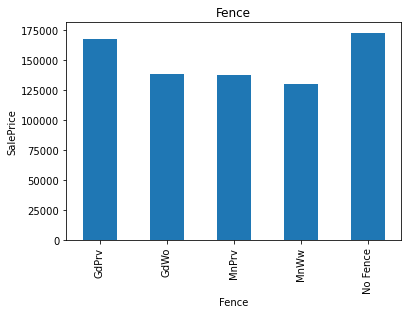

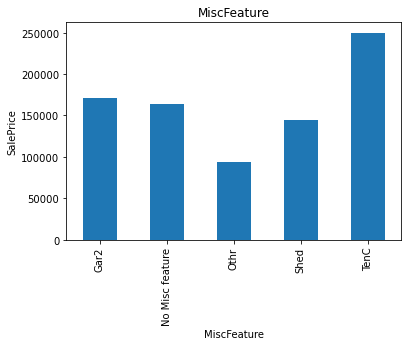

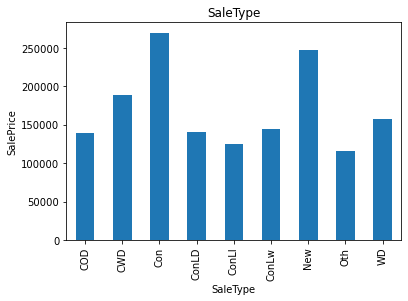

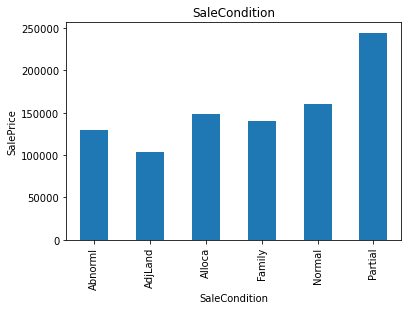

In [37]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### Analysing the outliers

In [38]:
df[numerical_features].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,2423.478767,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,1836.786749,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,9999.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [39]:
newnumerical_features=[feature for feature in numerical_features if feature not in year_feature + ["Id"]]

In [40]:
df[newnumerical_features].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000


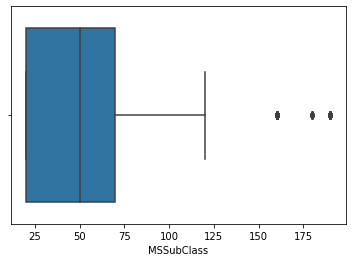

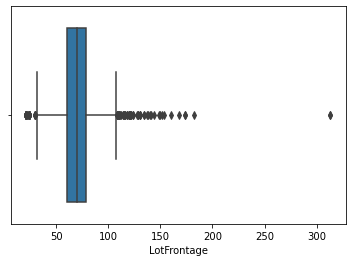

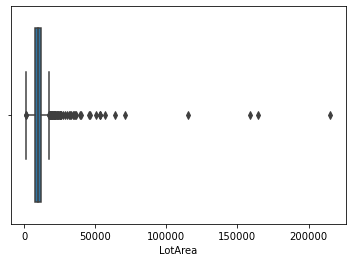

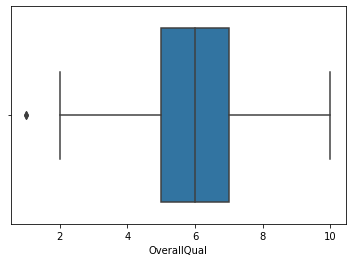

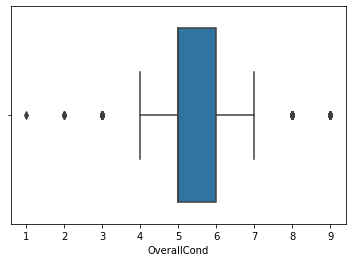

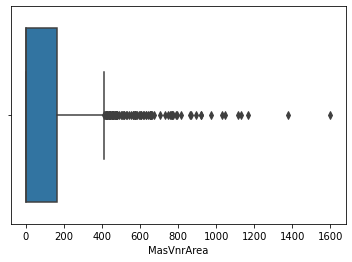

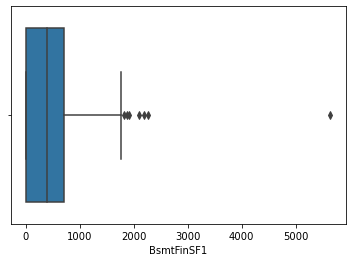

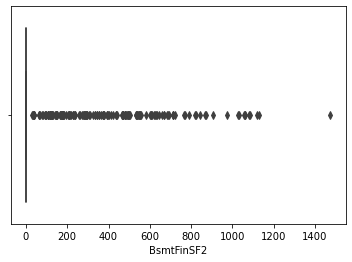

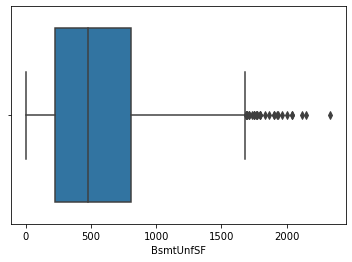

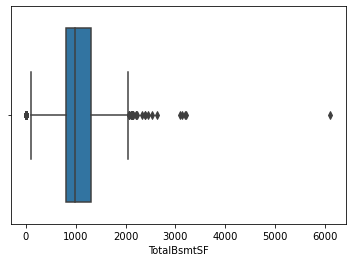

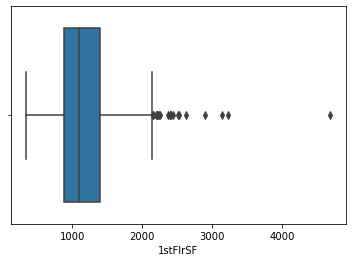

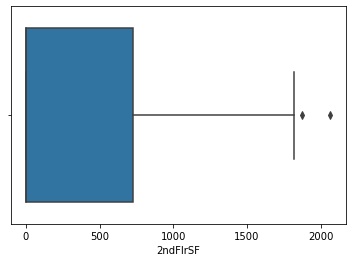

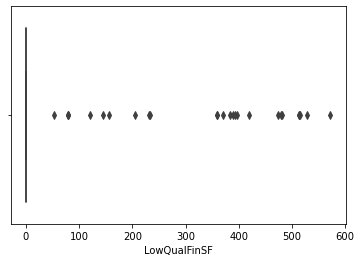

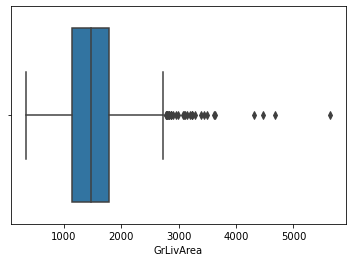

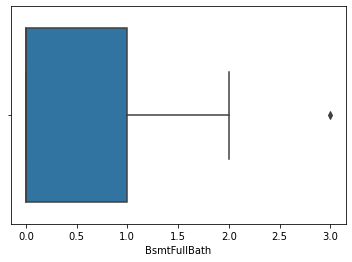

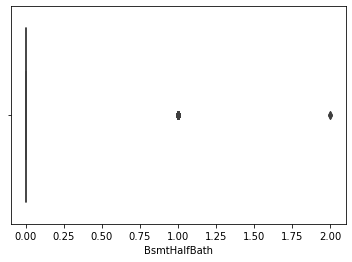

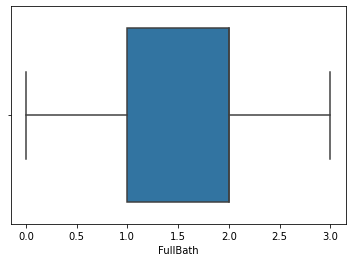

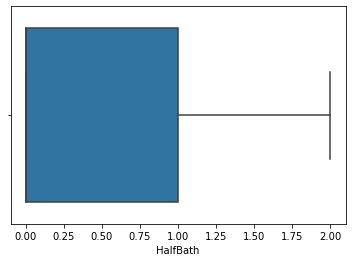

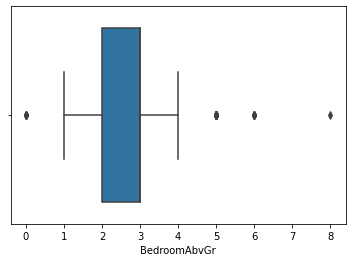

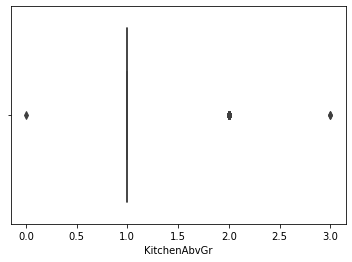

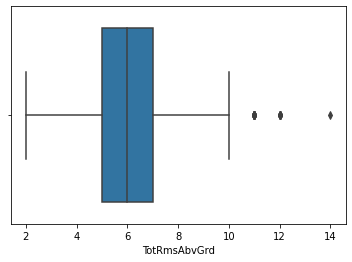

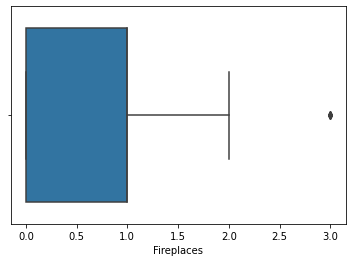

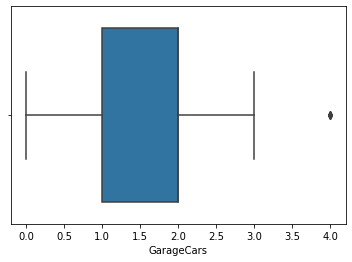

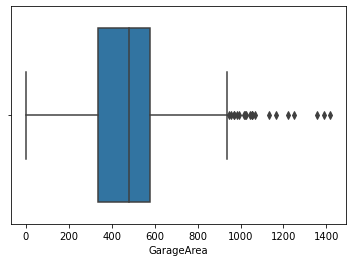

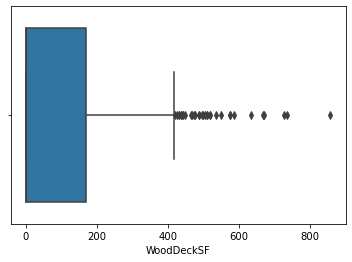

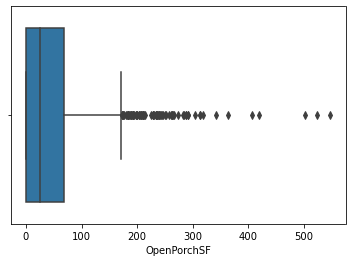

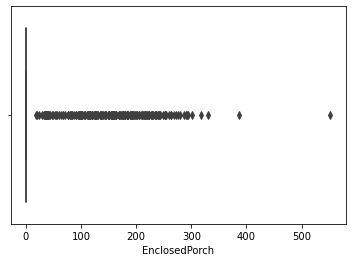

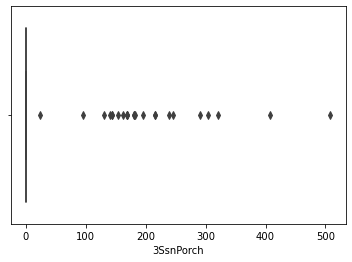

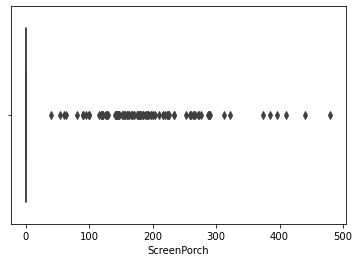

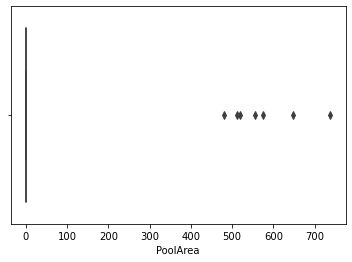

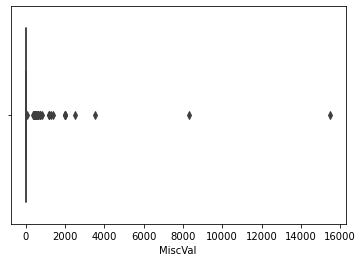

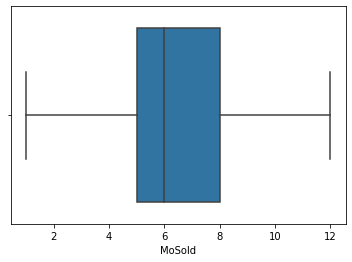

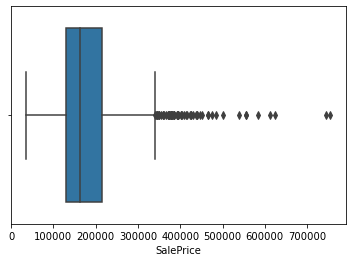

In [41]:
for feature in newnumerical_features:
    sns.boxplot(df[feature])
    plt.show()

In [42]:
#removing some extreme outliers

df[df["SalePrice"]>=650000]
df=df.loc[df["SalePrice"]<=650000]
df.loc[df["LotFrontage"]>300]
df=df.loc[df["LotFrontage"]<300]

#now data seems fine

In [43]:
df.shape

(1456, 81)

In [44]:
corr=df[newnumerical_features].corr()

### Correlation between numerical features

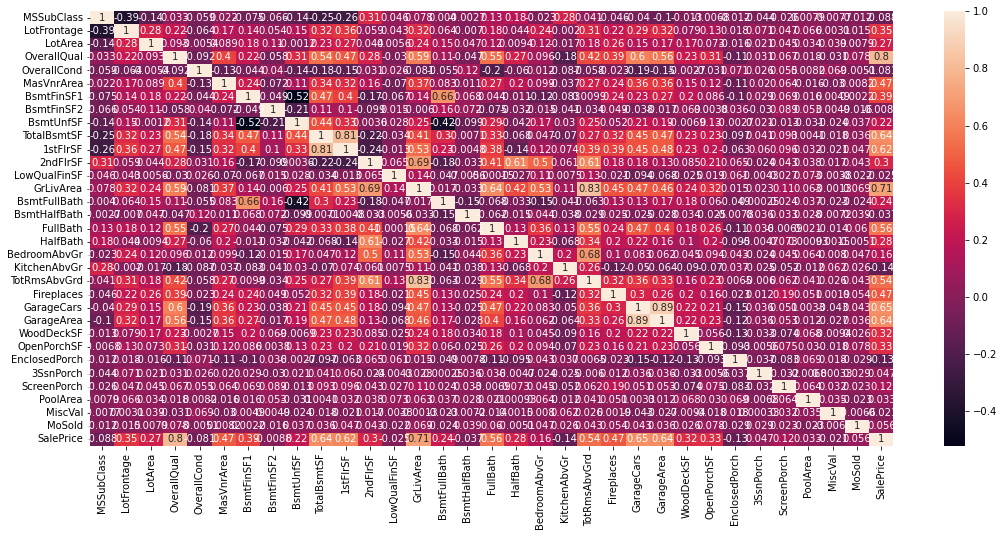

In [45]:
plt.figure(figsize=(18,8))
sns.heatmap(corr,annot=True)
plt.show()

In [46]:
# we can see some features have very high correlation like "GarageCars and Garage Area","1stflrsf and totalbsmtsf",
#"TotalRmsAbvGRD and GrLivArea"
# so we remove one features from each correlated features

### Encoding the categorical columns

In [47]:
df=df.drop(["Id","GarageCars","1stFlrSF","GrLivArea","YearBuilt","YearRemodAdd","YrSold","GarageYrBlt"],axis=1)
df=df.drop(["Neighborhood","Exterior1st","Exterior2nd"],axis=1)
#droping columns according to Lasso feature selection

In [48]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("Categorical features {}".format(len(categorical_features)))

Categorical features 40


In [49]:
for feature in categorical_features:
    print("The feature is {} and number of categories are {}".format(feature, len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 7
The feature is MasVnrType and number of categories are 4
The feature is ExterQual and number of categories are 4
The feature is ExterCond and number of categories are 5
The feature is Foundation and number of categories ar

In [50]:
enc_df=pd.get_dummies(df,columns=df[categorical_features].columns,drop_first=True)
#creating dummy variables


In [51]:
enc_df.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fire Place,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Misc feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,854,0,1,0,2,1,3,1,8,0,548,0,61,0,0,0,0,0,2,208500,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,0,0,0,1,2,0,3,1,6,1,460,298,0,0,0,0,0,0,5,181500,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,866,0,1,0,2,1,3,1,6,1,608,0,42,0,0,0,0,0,9,223500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,

In [52]:
#Columns that need to scale
col_need_scaling=enc_df.iloc[:,0:29].columns

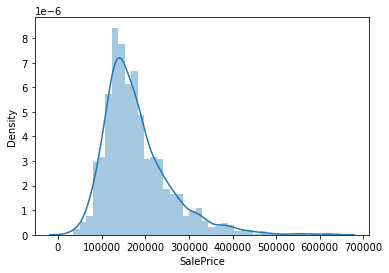

In [53]:
sns.distplot(enc_df["SalePrice"])
# sale price is right skewed so we ned to log transfer this column
enc_df["SalePrice"]=np.log(enc_df["SalePrice"])


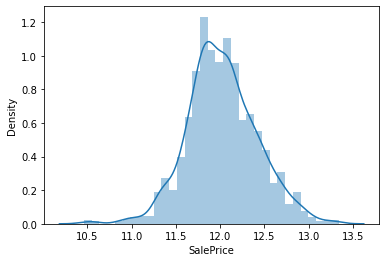

In [54]:
sns.distplot(enc_df["SalePrice"])
plt.show()

### Train Test Split

In [55]:
X=enc_df.drop(["SalePrice"],axis=1)
Y=enc_df["SalePrice"]

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1019, 198)
(437, 198)
(1019,)
(437,)


### Scaling the data

In [58]:
#Scaling X_train and X_test
scaler = MinMaxScaler()
model=scaler.fit(X_train[col_need_scaling])
X_train[col_need_scaling]=model.transform(X_train[col_need_scaling])
X_test[col_need_scaling]=scaler.fit_transform(X_test[col_need_scaling])

In [59]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fire Place,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Misc feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
464,0.000000,0.242236,0.033326,0.444444,0.500,0.098694,0.272566,0.000000,0.181507,0.325000,0.000000,0.0,0.0,0.0,0.666667,0.0,0.375,0.5,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.0,0.0,0.636364,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
471,0.235294,0.440994,0.049788,0.666667,0.625,0.000000,0.000000,0.000000,0.345890,0.252500,0.444444,0.0,0.0,0.0,0.666667,0.5,0.375,0.5,0.500000,0.333333,0.384173,0.000000,0.000000,0.0,0.0,0.575,0.0,0.0,0.909091,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,

In [60]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fire Place,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Misc feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
497,0.176471,0.254902,0.067237,0.625,0.571429,0.000000,0.175000,0.0,0.323734,0.320025,0.426443,0.0,0.333333,0.0,0.666667,0.0,0.666667,0.0,0.555556,0.000000,0.211640,0.000000,0.199203,0.0,0.0,0.0,0.0,0.0,0.454545,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1264,0.588235,0.084967,0.022723,0.500,0.428571,0.000000,0.141489,0.0,0.529029,0.438241,0.000000,0.0,0.333333,0.0,0.666667,0.0,0.333333,0.0,0.222222,0.000000,0.450617,0.197802,0.135458,0.0,0.0,0.0,0.0,0.0,0.636364,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1

### Linear Regression Model Building

In [61]:
# Building and fitting the Linear Regression model
Lr = LinearRegression()
Model1=Lr.fit(X_train,Y_train)
Y_train_pred=Model1.predict(X_train)
R2_score1=r2_score(Y_train,Y_train_pred)
print("R2 Score on training data {}".format(R2_score1))

# Evaluating the Linear Regression modelon Test data
Y_test_pred=Model1.predict(X_test)
R2_score1=r2_score(Y_test,Y_test_pred)
print("R2 Score on test data {}".format(R2_score1))

# Its clearly shows that our model is overfitting so let's try Regularization

R2 Score on training data 0.9098339035698658
R2 Score on test data -1.337953828919964e+23


### Ridge

In [62]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001,0.01,0.02, 0.1,0.5,1,10,100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.02, 0.1, 0.5, 1, 10,
                                   100]},
             return_train_score=True, scoring='r2', verbose=1)

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006140,0.003264,0.004736,0.006309,0.0001,{'alpha': 0.0001},0.878425,0.835262,0.830049,0.885578,0.874070,0.860677,0.023231,8,0.935524,0.938622,0.931846,0.933519,0.933355,0.934573,0.002338
1,0.003360,0.006720,0.003126,0.006253,0.001,{'alpha': 0.001},0.878365,0.835634,0.831214,0.885671,0.874286,0.861034,0.022879,7,0.935524,0.938619,0.931846,0.933519,0.933355,0.934573,0.002337
2,0.004162,0.006566,0.006749,0.008266,0.01,{'alpha': 0.01},0.877886,0.837617,0.840917,0.886445,0.876199,0.863813,0.020367,6,0.935518,0.938558,0.931828,0.933509,0.933347,0.934552,0.002321
3,0.007406,0.006519,0.001342,0.001126,0.02,{'alpha': 0.02},0.877555,0.838614,0.849174,0.887065,0.877930,0.866067,0.018723,5,0.935505,0.938500,0.931796,0.933487,0.933325,0.934522,0.002312
4,0.010322,0.008493,0.000433,0.000865,0.1,{'alpha': 0.1},0.877505,0.840867,0.880416,0.888982,0.885665,0.874687,0.017375,3,0.935266,0.938105,0.931318,0.933123,0.932941,0.934150,0.002342
5,0.004327,0.006876,0.000000,0.000000,0.5,{'alpha': 0.5},0.879693,0.845923,0.904944,0.888321,0.895404,0.882857,0.020245,2,0.933142,0.935740,0.928222,0.930553,0.930147,0.931561,0.002613
6,0.005585,0.006562,0.000503,0.000637,1,{'alpha': 1},0.879752,0.850046,0.908677,0.885229,0.897527,0.884246,0.019820,1,0.930468,0.932977,0.924864,0.927659,0.927008,0.928595,0.002829
7,0.004424,0.002721,0.001464,0.001100,10,{'alpha': 10},0.867319,0.858458,0.891030,0.848478,0.884905,0.870038,0.015925,4,0.901886,0.904544,0.894509,0.901333,0.897847,0.900024,0.003486
8,0.006893,0.007239,0.000404,0.000494,100,{'alpha': 100},0.785036,0.786054,0.785898,0.740120,0.793735,0.778169,0.019282,9,0.798674,0.796797,0.795399,0.807738,0.796571,0.799036,0.004476


In [64]:
model_cv.best_params_
# at alpha =10 model is performing best as mean 10 score =0.90454 and mean test score 0.862041

{'alpha': 1}

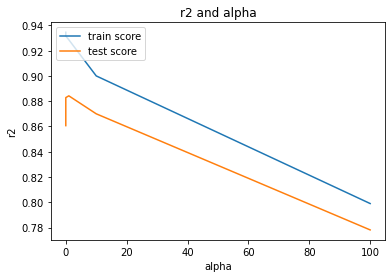

In [65]:
#lets plot mean test and mean train score with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results["param_alpha"],cv_results["mean_train_score"])
plt.plot(cv_results["param_alpha"],cv_results["mean_test_score"])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()
#we can see alpha =10 is optimum solution

In [66]:
#optimum alpha

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train,Y_train)
ridge.coef_

array([-0.02630528,  0.08554386,  0.06491623,  0.3102677 ,  0.1916002 ,
        0.0631764 ,  0.17084306,  0.06150799,  0.11745884,  0.22806521,
        0.15699278,  0.06325647,  0.05901935, -0.01766389,  0.15491332,
        0.07783325,  0.07426725,  0.00087275,  0.23861399,  0.10903536,
        0.17302317,  0.05093376,  0.03502035,  0.04506942,  0.03740995,
        0.06793482,  0.01655239, -0.00758514,  0.0168134 ,  0.07821277,
        0.03931372,  0.06937261, -0.01122784,  0.04569618, -0.02123345,
        0.04982707,  0.03817253,  0.01163358, -0.01636631,  0.05447391,
        0.00837511,  0.02535832, -0.01268668,  0.0395839 , -0.03426841,
       -0.00325896, -0.01790995,  0.01631247,  0.00661838,  0.01472897,
        0.05549482,  0.02969803,  0.00827983, -0.01599867,  0.01414068,
       -0.0016841 ,  0.01193355,  0.04302205,  0.07186694,  0.        ,
       -0.0887109 , -0.00697493,  0.00312318,  0.        ,  0.00235629,
        0.01196421, -0.05733601, -0.02662594,  0.0060459 , -0.00

In [67]:
print("R2 score on training data at alpha=10 is",ridge.score(X_train,Y_train))
print("R2 score on test data at alpha=10 is",ridge.score(X_test,Y_test))


R2 score on training data at alpha=10 is 0.9017184175326546
R2 score on test data at alpha=10 is 0.8802482741703294


In [68]:
y_pred_test=ridge.predict(X_test)

In [69]:
r2_score(Y_test,y_pred_test)

0.8802482741703294

In [70]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.956),
 ('MSSubClass', -0.106),
 ('LotFrontage', -0.098),
 ('LotArea', -0.089),
 ('OverallQual', -0.083),
 ('OverallCond', -0.075),
 ('MasVnrArea', -0.069),
 ('BsmtFinSF1', -0.066),
 ('BsmtFinSF2', -0.061),
 ('BsmtUnfSF', -0.06),
 ('TotalBsmtSF', -0.057),
 ('2ndFlrSF', -0.048),
 ('LowQualFinSF', -0.047),
 ('BsmtFullBath', -0.047),
 ('BsmtHalfBath', -0.043),
 ('FullBath', -0.042),
 ('HalfBath', -0.037),
 ('BedroomAbvGr', -0.034),
 ('KitchenAbvGr', -0.033),
 ('TotRmsAbvGrd', -0.031),
 ('Fireplaces', -0.03),
 ('GarageArea', -0.029),
 ('WoodDeckSF', -0.029),
 ('OpenPorchSF', -0.029),
 ('EnclosedPorch', -0.029),
 ('3SsnPorch', -0.027),
 ('ScreenPorch', -0.027),
 ('PoolArea', -0.027),
 ('MiscVal', -0.027),
 ('MoSold', -0.026),
 ('MSZoning_FV', -0.025),
 ('MSZoning_RH', -0.024),
 ('MSZoning_RL', -0.024),
 ('MSZoning_RM', -0.024),
 ('Street_Pave', -0.023),
 ('Alley_No Alley Access', -0.022),
 ('Alley_Pave', -0.021),
 ('LotShape_IR2', -0.021),
 ('LotShape_IR3', -0.021),
 ('LotSh

### Lasso

In [71]:
parameter={"alpha": [0.0001,0.001,0.01,0.1,1,10,100,200,1000]}
folds=5
lasso=Lasso()
model_cv=GridSearchCV(estimator=lasso,cv=folds,param_grid = parameter,scoring='r2',verbose=1,return_train_score=True)
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [72]:
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result[["param_alpha","mean_test_score","mean_train_score"]]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,0.884748,0.931113
1,0.001,0.880833,0.903710
2,0.01,0.764666,0.778368
3,0.1,0.069977,0.072584
4,1,-0.003552,0.000000
5,10,-0.003552,0.000000
6,100,-0.003552,0.000000
7,200,-0.003552,0.000000
8,1000,-0.003552,0.000000


In [73]:
model_cv.best_params_

{'alpha': 0.0001}

In [74]:
alpha=0.0001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,Y_train)
print(lasso.score(X_train,Y_train))
print(lasso.score(X_test,Y_test))

0.9274159238548034
0.877366273607722


In [75]:
lasso.coef_

array([-1.23787735e-02,  1.00112451e-01,  2.76562443e-01,  5.46589689e-01,
        3.28450407e-01,  4.47014628e-02,  1.57873838e-01,  8.10922425e-02,
       -0.00000000e+00,  6.15367962e-01,  2.62406970e-01,  1.08028037e-01,
        2.99137153e-02, -1.83389897e-02,  1.18011095e-01,  7.82178792e-02,
       -7.04368462e-03, -3.52968342e-02,  3.36590074e-01,  1.21503219e-01,
        2.69337713e-01,  2.56818446e-02,  5.55657220e-03,  5.51254735e-02,
        9.24952036e-02,  7.18011834e-02, -0.00000000e+00, -0.00000000e+00,
        9.20890947e-03,  3.23861459e-01,  2.81146606e-01,  2.85955197e-01,
        2.08455245e-01,  9.07398796e-02, -1.12478662e-02,  4.38989676e-02,
        2.91482156e-02,  0.00000000e+00, -1.56638253e-02,  6.93174181e-02,
        6.63901668e-04,  4.04593291e-02, -1.41506524e-02,  2.64830974e-02,
       -3.46807836e-02, -3.29201172e-02, -1.52505623e-02,  4.50511549e-02,
       -0.00000000e+00,  4.36763349e-02,  8.64673747e-02,  5.30623971e-02,
        1.04072727e-01, -

#### Feature selection Using lasso

In [76]:
model_parameters = list((lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))

In [77]:
Coef_df=pd.DataFrame(coef_list,columns=["feature","Coeficient"])

In [78]:
Zero_coef_feature=Coef_df.loc[Coef_df["Coeficient"]==0.0]

In [79]:
features_need_del=list(Zero_coef_feature["feature"])
len(features_need_del)

51

In [80]:
x_train=X_train.drop(features_need_del,axis=1)
x_test=X_test.drop(features_need_del,axis=1)

In [81]:
print(x_train.shape)
print(x_test.shape)

(1019, 147)
(437, 147)


In [82]:
x_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAn,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,BldgType_2fmCon,BldgType_Twnhs,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_WdShngl,MasVnrType_Stone,ExterQual_Fa,ExterQual_TA,ExterCond_Fa,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fire Place,FireplaceQu_TA,GarageType_Attchd,GarageType_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Misc feature,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
464,0.000000,0.242236,0.033326,0.444444,0.500,0.098694,0.272566,0.000000,0.325000,0.000000,0.0,0.0,0.0,0.666667,0.0,0.375,0.5,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.636364,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
471,0.235294,0.440994,0.049788,0.666667,0.625,0.000000,0.000000,0.000000,0.252500,0.444444,0.0,0.0,0.0,0.666667,0.5,0.375,0.5,0.500000,0.333333,0.384173,0.000000,0.000000,0.0,0.0,0.575,0.909091,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
1332,0.000000,0.285714,0.035416,0.333333,0.625,0.000000,0.305310,0.000000,0.255000,0.000000,0.0,0.5,0.0,0.333333,0.0,0.250,0.5,0.083333,0.333333,0.207194,0.000000,0.000000,0.0,0.0,0.000,0.363636,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
435,0.235294,0.136646,0.043782,0.666667,0.625,0.000000,0.170354,0.305235,0.249688,0.458746,0.0,0.5,0.0,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.395683,0.184364,0.111517,0.0,0.0,0.000,0.272727,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
1209,0.000000,0.397516,0.041515,0.777778,0.500,0.304790,0.539823,0

### Lets Train Model again on new data

### Ridge

In [83]:
params = {'alpha': [0.001,0.01,0.1,0.3,0.7,1,5,10,100,1000,5]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, Y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.3, 0.7, 1, 5, 10, 100,
                                   1000, 5]},
             return_train_score=True, scoring='r2', verbose=1)

In [84]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005187,0.003165,0.001600,0.003200,0.001,{'alpha': 0.001},0.877821,0.842408,0.913701,0.902380,0.890151,0.885292,0.024567,6,0.934390,0.936809,0.928625,0.931292,0.930685,0.932360,0.002892
1,0.005992,0.005945,0.000200,0.000400,0.01,{'alpha': 0.01},0.878135,0.842703,0.913803,0.902428,0.890990,0.885612,0.024509,5,0.934388,0.936807,0.928622,0.931289,0.930683,0.932358,0.002892
2,0.008936,0.007341,0.000373,0.000746,0.1,{'alpha': 0.1},0.880482,0.845204,0.914324,0.902504,0.897104,0.887924,0.023976,4,0.934232,0.936599,0.928413,0.931086,0.930480,0.932162,0.002899
3,0.000470,0.000941,0.003310,0.006620,0.3,{'alpha': 0.3},0.882882,0.849004,0.914504,0.901294,0.903376,0.890212,0.022970,3,0.933408,0.935629,0.927464,0.930126,0.929498,0.931225,0.002915
4,0.005596,0.006586,0.003589,0.006227,0.7,{'alpha': 0.7},0.883986,0.853386,0.914048,0.897454,0.906706,0.891116,0.021371,1,0.931247,0.933319,0.925133,0.927839,0.927086,0.928925,0.002954
5,0.008289,0.008340,0.001029,0.001308,1,{'alpha': 1},0.883979,0.855402,0.913542,0.894583,0.906974,0.890896,0.020458,2,0.929624,0.931664,0.923408,0.926213,0.925338,0.927250,0.002987
6,0.004072,0.002037,0.003043,0.003168,5,{'alpha': 5},0.878874,0.861439,0.904786,0.870319,0.898737,0.882831,0.016522,7,0.913663,0.916349,0.906979,0.911785,0.909352,0.911625,0.003263
7,0.006780,0.008304,0.000000,0.000000,10,{'alpha': 10},0.870107,0.858465,0.892830,0.851995,0.888338,0.872347,0.016045,9,0.899562,0.902698,0.893049,0.899577,0.895817,0.898141,0.003352
8,0.004363,0.006554,0.000000,0.000000,100,{'alpha': 100},0.779521,0.778428,0.787524,0.739577,0.793609,0.775732,0.018907,10,0.793314,0.792867,0.789928,0.803151,0.792031,0.794258,0.004596
9,0.003420,0.006840,0.003381,0.006762,1000,{'alpha': 1000},0.534622,0.518928,0.527130,0.532408,0.540969,0.530811,0.007416,11,0.534908,0.534725,0.537328,0.550911,0.539040,0.539383,0.005982


In [85]:
model_cv.best_params_

{'alpha': 0.7}

In [95]:
alpha = 0.7
ridge = Ridge(alpha=alpha)

ridge.fit(x_train,Y_train)
ridge.coef_

array([-0.01510695,  0.10877371,  0.23219721,  0.5049075 ,  0.31273071,
        0.05741758,  0.15636937,  0.09542659,  0.53690833,  0.24968127,
        0.13440769,  0.033207  , -0.02591529,  0.13328764,  0.07735271,
        0.00791708, -0.0269318 ,  0.34679434,  0.13541689,  0.25637429,
        0.03590574,  0.0138302 ,  0.07274154,  0.10479712,  0.08046012,
        0.01199328,  0.28025865,  0.238773  ,  0.24650258,  0.17086603,
        0.11159589, -0.01211736,  0.05192124,  0.03524119, -0.01587808,
        0.08149614,  0.01208493,  0.04857069, -0.06866193,  0.02886777,
       -0.0409056 , -0.0465619 , -0.01653804,  0.04574067,  0.04865924,
        0.08881325,  0.06338902,  0.0874659 ,  0.0632239 ,  0.05581766,
        0.23771352,  0.14409163, -0.49050272, -0.00266875, -0.04726531,
        0.04673532,  0.00556648, -0.02757035, -0.04862949, -0.04872314,
       -0.0236411 , -0.07562045, -0.026     , -0.07065681,  0.01818824,
        0.1182018 ,  0.01242156, -0.08576406, -0.01926586, -0.00

In [96]:
print("R2 score on training data at alpha=10 is",ridge.score(x_train,Y_train))
print("R2 score on test data at alpha=10 is",ridge.score(x_test,Y_test))

R2 score on training data at alpha=10 is 0.9268300318575118
R2 score on test data at alpha=10 is 0.8758541599969452


In [99]:
# Top 5 Variable using ridge
model_parameters = list((ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = x_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
coef_df.loc[coef_df["Values"]>=0.28]
#Top five variables

,Features,Values
0,constant,10.088
4,OverallQual,0.505
5,OverallCond,0.313
9,TotalBsmtSF,0.537
18,TotRmsAbvGrd,0.347
27,MSZoning_FV,0.280


### Lasso

In [88]:
parameter={'alpha': [0.0001,0.001,0.01,0.1,0.3,0.7,1,5,1.5,10,100,1000]}
folds=5
lasso=Lasso()
model_cv=GridSearchCV(estimator=lasso,cv=folds,param_grid = parameter,scoring='r2',verbose=1,return_train_score=True)
model_cv.fit(x_train, Y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.7, 1, 5,
                                   1.5, 10, 100, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [89]:
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result[["param_alpha","mean_test_score","mean_train_score"]]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,0.890588,0.930399
1,0.001,0.880712,0.903679
2,0.01,0.765029,0.778724
3,0.1,0.069977,0.072584
4,0.3,-0.003552,0.000000
5,0.7,-0.003552,0.000000
6,1,-0.003552,0.000000
7,5,-0.003552,0.000000
8,1.5,-0.003552,0.000000
9,10,-0.003552,0.000000


In [90]:
model_cv.best_params_

{'alpha': 0.0001}

In [91]:
alpha=0.0001
lasso=Lasso(alpha=alpha)
lasso.fit(x_train,Y_train)
print("R2 score at alpha =0.0001 on training data is",lasso.score(x_train,Y_train))
print("R2 score at alpha =0.0001 on test data is",lasso.score(x_test,Y_test))

R2 score at alpha =0.0001 on training data is 0.9274152266879592
R2 score at alpha =0.0001 on test data is 0.8773732463424812


In [92]:
lasso.coef_

array([-1.24040129e-02,  1.00139277e-01,  2.76745824e-01,  5.46530264e-01,
        3.28472063e-01,  4.40181609e-02,  1.57914481e-01,  8.11306879e-02,
        6.15429622e-01,  2.62483715e-01,  1.08038838e-01,  2.99204009e-02,
       -1.83277903e-02,  1.17975056e-01,  7.82103098e-02, -7.18131854e-03,
       -3.52470812e-02,  3.36567582e-01,  1.21501576e-01,  2.69343770e-01,
        2.56961756e-02,  5.53887951e-03,  5.51286477e-02,  9.24470860e-02,
        7.18173435e-02,  9.21747769e-03,  3.23891919e-01,  2.81127588e-01,
        2.85924599e-01,  2.08424557e-01,  9.07924531e-02, -1.12430168e-02,
        4.39040506e-02,  2.91676323e-02, -1.56722293e-02,  6.92793276e-02,
        6.72211344e-04,  4.04499039e-02, -1.41291487e-02,  2.64706270e-02,
       -3.47050996e-02, -3.30245644e-02, -1.52561176e-02,  4.50651143e-02,
        4.36825931e-02,  8.64600450e-02,  5.30225631e-02,  1.04043887e-01,
        5.66023578e-02,  2.70414768e-02,  2.21105632e-01,  8.64457743e-02,
       -7.20707956e-01, -

In [94]:
# Top 5 Variable using Lasso
model_parameters = list((lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = x_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
coef_df.loc[coef_df["Values"]>=0.3]
#Top five variables

,Features,Values
0,constant,10.144
4,OverallQual,0.547
5,OverallCond,0.328
9,TotalBsmtSF,0.615
18,TotRmsAbvGrd,0.337
27,MSZoning_FV,0.324


### Conclusion

#### We got decent R2 score 
` Ridge : 92% and 87%
 Lasso : 92% and 87%

### Try question one double the alpha

In [103]:
alpha=1.4
ridge=Ridge(alpha=alpha)
ridge.fit(x_train,Y_train)
print("R2 score at alpha =1.4 on training data is",ridge.score(x_train,Y_train))
print("R2 score at alpha =1.4 on test data is",ridge.score(x_test,Y_test))

R2 score at alpha =1.4 on training data is 0.9236367545415826
R2 score at alpha =1.4 on test data is 0.878692510348012


In [104]:
ridge.coef_

array([-0.02212312,  0.10457141,  0.1822015 ,  0.48105837,  0.29679346,
        0.06241938,  0.15122058,  0.08752119,  0.47977402,  0.2241197 ,
        0.11794854,  0.03707114, -0.02725211,  0.14244582,  0.07784965,
        0.03571516, -0.02108047,  0.33940738,  0.13930708,  0.2426836 ,
        0.04193188,  0.01626101,  0.07395126,  0.09485723,  0.07763649,
        0.01312163,  0.21732208,  0.17031408,  0.1874394 ,  0.11009836,
        0.098824  , -0.01244377,  0.05549843,  0.03763925, -0.01568837,
        0.08133007,  0.01771974,  0.04651514, -0.04844309,  0.03213184,
       -0.04194904, -0.03250412, -0.01727396,  0.03629821,  0.04244242,
        0.08194076,  0.05622412,  0.0632648 ,  0.05286198,  0.04699433,
        0.188307  ,  0.13868474, -0.36389123, -0.00082987, -0.04725455,
        0.03861132,  0.0039572 ,  0.00285759, -0.04375648, -0.04944639,
       -0.02620438, -0.06672958, -0.01302721, -0.05912771,  0.02677792,
        0.10326683,  0.01451079, -0.09279984, -0.02216587, -0.00

In [106]:
# Top 5 Variable using ridge
model_parameters = list((ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = x_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
coef_df.loc[coef_df["Values"]>=0.20]
#Top five variables

,Features,Values
0,constant,10.268
4,OverallQual,0.481
5,OverallCond,0.297
9,TotalBsmtSF,0.480
10,2ndFlrSF,0.224
18,TotRmsAbvGrd,0.339
20,GarageArea,0.243
27,MSZoning_FV,0.217


In [107]:
alpha=0.0002
lasso=Lasso(alpha=alpha)
lasso.fit(x_train,Y_train)
print("R2 score at alpha =0.0002 on training data is",lasso.score(x_train,Y_train))
print("R2 score at alpha =0.0002 on test data is",lasso.score(x_test,Y_test))

R2 score at alpha =0.0002 on training data is 0.9233201100228111
R2 score at alpha =0.0002 on test data is 0.8844447856504097


In [109]:
# Top 5 Variable using Lasso
model_parameters = list((lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = x_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
coef_df.loc[coef_df["Values"]>=0.26]
#Top five variables

,Features,Values
0,constant,10.378
4,OverallQual,0.561
5,OverallCond,0.329
9,TotalBsmtSF,0.610
18,TotRmsAbvGrd,0.343
20,GarageArea,0.261


In [110]:
lasso.coef_

array([-0.01921319,  0.081651  ,  0.22437898,  0.56125717,  0.3289386 ,
        0.03754488,  0.14718173,  0.05662737,  0.61000693,  0.24718005,
        0.09770164,  0.03625664, -0.00912784,  0.11565947,  0.07510465,
       -0.        , -0.02608793,  0.34311738,  0.12395211,  0.2609183 ,
        0.02965027,  0.        ,  0.04679173,  0.06788601,  0.06711989,
        0.00771896,  0.23870303,  0.18261529,  0.20148275,  0.11971987,
        0.05967223, -0.00865306,  0.04550329,  0.02890584, -0.01547632,
        0.05814227,  0.        ,  0.02856533, -0.        ,  0.02795098,
       -0.03025625, -0.        , -0.01580174,  0.03179819,  0.0231442 ,
        0.06636984,  0.02276745,  0.06714636,  0.03265762,  0.        ,
        0.14638598,  0.07287467, -0.64893853, -0.        , -0.04246455,
        0.01774681,  0.00916796, -0.        , -0.03146943, -0.01691203,
       -0.00139026, -0.05174419, -0.        , -0.04639312,  0.0057217 ,
        0.05928553,  0.00928044, -0.08289951, -0.01726181, -0.  

### Question 3 Droping five most important variable and retrain the model

In [111]:
x_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAn,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,BldgType_2fmCon,BldgType_Twnhs,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_WdShngl,MasVnrType_Stone,ExterQual_Fa,ExterQual_TA,ExterCond_Fa,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fire Place,FireplaceQu_TA,GarageType_Attchd,GarageType_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Misc feature,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
464,0.000000,0.242236,0.033326,0.444444,0.500,0.098694,0.272566,0.000000,0.325000,0.000000,0.0,0.0,0.0,0.666667,0.0,0.375,0.5,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.636364,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
471,0.235294,0.440994,0.049788,0.666667,0.625,0.000000,0.000000,0.000000,0.252500,0.444444,0.0,0.0,0.0,0.666667,0.5,0.375,0.5,0.500000,0.333333,0.384173,0.000000,0.000000,0.0,0.0,0.575,0.909091,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
1332,0.000000,0.285714,0.035416,0.333333,0.625,0.000000,0.305310,0.000000,0.255000,0.000000,0.0,0.5,0.0,0.333333,0.0,0.250,0.5,0.083333,0.333333,0.207194,0.000000,0.000000,0.0,0.0,0.000,0.363636,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
435,0.235294,0.136646,0.043782,0.666667,0.625,0.000000,0.170354,0.305235,0.249688,0.458746,0.0,0.5,0.0,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.395683,0.184364,0.111517,0.0,0.0,0.000,0.272727,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
1209,0.000000,0.397516,0.041515,0.777778,0.500,0.304790,0.539823,0

In [112]:
Top_5=["OverallQual","OverallCond","TotalBsmtSF","TotRmsAbvGrd","MSZoning_FV"]

In [113]:
x_train=x_train.drop(["OverallQual","OverallCond","TotalBsmtSF","TotRmsAbvGrd","MSZoning_FV"],axis=1)

In [118]:
x_test=x_test.drop(["OverallQual","OverallCond","TotalBsmtSF","TotRmsAbvGrd","MSZoning_FV"],axis=1)

##### Retrain ridge and lasso

In [114]:
params = {'alpha': [0.001,0.01,0.1,0.3,0.7,1,5,10,100,1000,5]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, Y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.3, 0.7, 1, 5, 10, 100,
                                   1000, 5]},
             return_train_score=True, scoring='r2', verbose=1)

In [115]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003353,0.000587,0.001240,0.000413,0.001,{'alpha': 0.001},0.837351,0.825150,0.834736,0.800897,0.870616,0.833750,0.022478,8,0.892592,0.890893,0.892106,0.897767,0.886795,0.892031,0.003520
1,0.003016,0.000030,0.001396,0.000495,0.01,{'alpha': 0.01},0.837776,0.825258,0.835150,0.801066,0.870930,0.834036,0.022541,7,0.892590,0.890892,0.892104,0.897766,0.886793,0.892029,0.003520
2,0.003833,0.000831,0.002146,0.000349,0.1,{'alpha': 0.1},0.840892,0.826285,0.838288,0.802359,0.872866,0.836138,0.022866,4,0.892466,0.890802,0.891966,0.897664,0.886655,0.891910,0.003529
3,0.006572,0.006805,0.000490,0.000774,0.3,{'alpha': 0.3},0.844021,0.828209,0.842447,0.803736,0.874005,0.838483,0.022896,3,0.891826,0.890315,0.891279,0.897124,0.886003,0.891309,0.003556
4,0.003758,0.007516,0.000400,0.000800,0.7,{'alpha': 0.7},0.845636,0.830885,0.847191,0.803972,0.873222,0.840181,0.022663,2,0.890125,0.888932,0.889420,0.895619,0.884341,0.889688,0.003594
5,0.005359,0.006342,0.000818,0.001002,1,{'alpha': 1},0.845802,0.832214,0.849446,0.803369,0.872061,0.840579,0.022590,1,0.888801,0.887805,0.887933,0.894417,0.883068,0.888405,0.003616
6,0.002752,0.002049,0.001212,0.000990,5,{'alpha': 5},0.840552,0.834835,0.853715,0.791951,0.858990,0.836009,0.023685,5,0.874250,0.874731,0.871742,0.881379,0.869878,0.874396,0.003908
7,0.001188,0.001917,0.000200,0.000399,10,{'alpha': 10},0.831545,0.830054,0.846037,0.780441,0.847782,0.827172,0.024462,9,0.860853,0.861862,0.857634,0.869217,0.857699,0.861453,0.004231
8,0.005036,0.006475,0.000620,0.000835,100,{'alpha': 100},0.752659,0.752568,0.758601,0.701379,0.765116,0.746065,0.022816,10,0.765364,0.764138,0.763164,0.779189,0.764618,0.767295,0.005990
9,0.000200,0.000400,0.001871,0.003742,1000,{'alpha': 1000},0.521902,0.505313,0.514305,0.518601,0.527872,0.517598,0.007574,11,0.521677,0.521953,0.524285,0.538139,0.525838,0.526379,0.006077


In [116]:
model_cv.best_params_

{'alpha': 1}

In [119]:
alpha=1
ridge=Ridge(alpha=alpha)
ridge.fit(x_train,Y_train)
print("R2 score at alpha =1.4 on training data is",ridge.score(x_train,Y_train))
print("R2 score at alpha =1.4 on test data is",ridge.score(x_test,Y_test))

R2 score at alpha =1.4 on training data is 0.8852440240121839
R2 score at alpha =1.4 on test data is 0.7897517797509485


In [130]:
# Top 5 Variable using ridge
model_parameters = list((ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = x_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
top5ridge=coef_df.loc[coef_df["Values"]>=0.20]
top5ridge.sort_values(by="Values",ascending=False)
#Top five variables

,Features,Values
0,constant,10.803
16,GarageArea,0.321
7,2ndFlrSF,0.277
11,FullBath,0.273
13,BedroomAbvGr,0.269
3,LotArea,0.236
5,BsmtFinSF1,0.234
46,Condition2_Feedr,0.234
15,Fireplaces,0.232


In [121]:
parameter={'alpha': [0.0001,0.001,0.01,0.1,0.3,0.7,1,5,1.5,10,100,1000]}
folds=5
lasso=Lasso()
model_cv=GridSearchCV(estimator=lasso,cv=folds,param_grid = parameter,scoring='r2',verbose=1,return_train_score=True)
model_cv.fit(x_train, Y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.7, 1, 5,
                                   1.5, 10, 100, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [122]:
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result[["param_alpha","mean_test_score","mean_train_score"]]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,0.839045,0.890630
1,0.001,0.823432,0.859738
2,0.01,0.707216,0.723835
3,0.1,0.069977,0.072584
4,0.3,-0.003552,0.000000
5,0.7,-0.003552,0.000000
6,1,-0.003552,0.000000
7,5,-0.003552,0.000000
8,1.5,-0.003552,0.000000
9,10,-0.003552,0.000000


In [123]:
model_cv.best_params_

{'alpha': 0.0001}

In [124]:
alpha=0.0001
lasso=Lasso(alpha=alpha)
lasso.fit(x_train,Y_train)
print("R2 score at alpha =0.0002 on training data is",lasso.score(x_train,Y_train))
print("R2 score at alpha =0.0002 on test data is",lasso.score(x_test,Y_test))

R2 score at alpha =0.0002 on training data is 0.8867363430280625
R2 score at alpha =0.0002 on test data is 0.7608189291058767


In [129]:
# Top 5 Variable using Lasso
model_parameters = list((lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = x_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
top5lasso=coef_df.loc[coef_df["Values"]>=0.26]
top5lasso.sort_values(by="Values",ascending=False)
#Top five variables

,Features,Values
0,constant,10.764
16,GarageArea,0.360
3,LotArea,0.323
7,2ndFlrSF,0.303
13,BedroomAbvGr,0.280
11,FullBath,0.275
